fractal like tree daigram showing mass ditribution of halos. Initial view is all present day halos. when you click one of them you see its main progenitors and urtles all the way down.

In [49]:
import ytree
import numpy as np
import matplotlib.pyplot as plt
import squarify  
import seaborn as sns
import matplotlib
from random import sample

In [2]:
treedir = "/Users/fardila/Documents/Data/data_viz/Enia_project/trees/"
treefile = 'tree_0_0_1.dat'

In [3]:
a = ytree.load(treedir+treefile)
a.set_selector("max_field_value", "mvir") # the first progenitor descendant will be the most massive one

Performance will be improved by saving this arbor with "save_arbor" and reloading:
	>>> a = ytree.load("/Users/fardila/Documents/Data/data_viz/Enia_project/trees/tree_0_0_1.dat")
	>>> fn = a.save_arbor()
	>>> a = ytree.load(fn)


In [4]:
print(a.size)

Loading tree roots: 100%|██████████| 8214616832/8214616832 [00:21<00:00, 375918564.34it/s]

260610


# example treemap

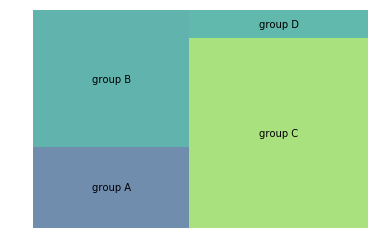

In [9]:
# If you have 2 lists
squarify.plot(sizes=[13,22,35,5], label=["group A", "group B", "group C", "group D"], alpha=.7 )
plt.axis('off')
plt.show()

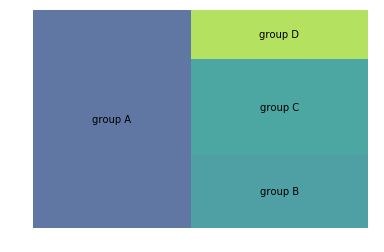

In [10]:
# If you have a data frame?
import pandas as pd
df = pd.DataFrame({'nb_people':[8,3,4,2], 'group':["group A", "group B", "group C", "group D"] })
squarify.plot(sizes=df['nb_people'], label=df['group'], alpha=.8 )
plt.axis('off')
plt.show()

# use main progenitors of present day most massive halo 

In [17]:
a['mvir']

Reading root fields: 100%|██████████| 260610/260610 [00:22<00:00, 11441.00it/s]


YTArray([2.217e+14, 1.572e+14, 1.562e+14, ..., 2.726e+08, 2.726e+08,
         2.726e+08]) Msun/h

In [41]:

masses_all_halos_today = np.array(a['mvir'])

In [135]:
np.log10(masses_all_halos_today)

array([14.34576569, 14.19645254, 14.19368103, ...,  8.43552585,
        8.43552585,  8.43552585])

In [215]:
def make_treemap_from_halo_masses(halo_masses, n=1000, random = False, log=False, sorted_by=None, labels=None):
    
    if len(halo_masses)<n:
        n=len(halo_masses)
    
    if random:
        halo_masses = sample(list(halo_masses), n)
        halo_masses.sort()
    else: #take top n halos
        halo_masses = halo_masses[: n]
    
    if log:
        halo_masses = np.log10(halo_masses)
        colorbar_label = u'Halo Mass $[\log($ M$_{\odot})]$'
    else:
        exponent = int(max(np.log10(halo_masses)))
        colorbar_label = u'Halo Mass $[10^{0}$ M$_{{\odot}}]$'.format({exponent})
        
    if sorted_by is not None:
        halo_masses = halo_masses[np.argsort(sorted_by)]
        labels = labels[np.argsort(sorted_by)]
        
    # create a color palette, mapped to these values
    cmap = matplotlib.cm.jet
    mini=min(halo_masses)
    maxi=max(halo_masses)
    norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
    colors = [cmap(norm(value)) for value in halo_masses]
    
    
    plt.figure(figsize=[20,20])
    sns.set()

    # create dummy invisible image with a color map
    img = plt.imshow([halo_masses], cmap=cmap)
    img.set_visible(False)


    squarify.plot(sizes=halo_masses,label=labels, alpha=.7, color=colors )
    cbar = plt.colorbar(img, orientation="horizontal", shrink=.96, pad=0.1)
    cbar.ax.tick_params(labelsize=20) 
    cbar.set_label(label= colorbar_label,size=30,weight='bold')
    cbar.set_alpha(0.7)
    cbar.draw_all()
    plt.axis('off')
    plt.show()

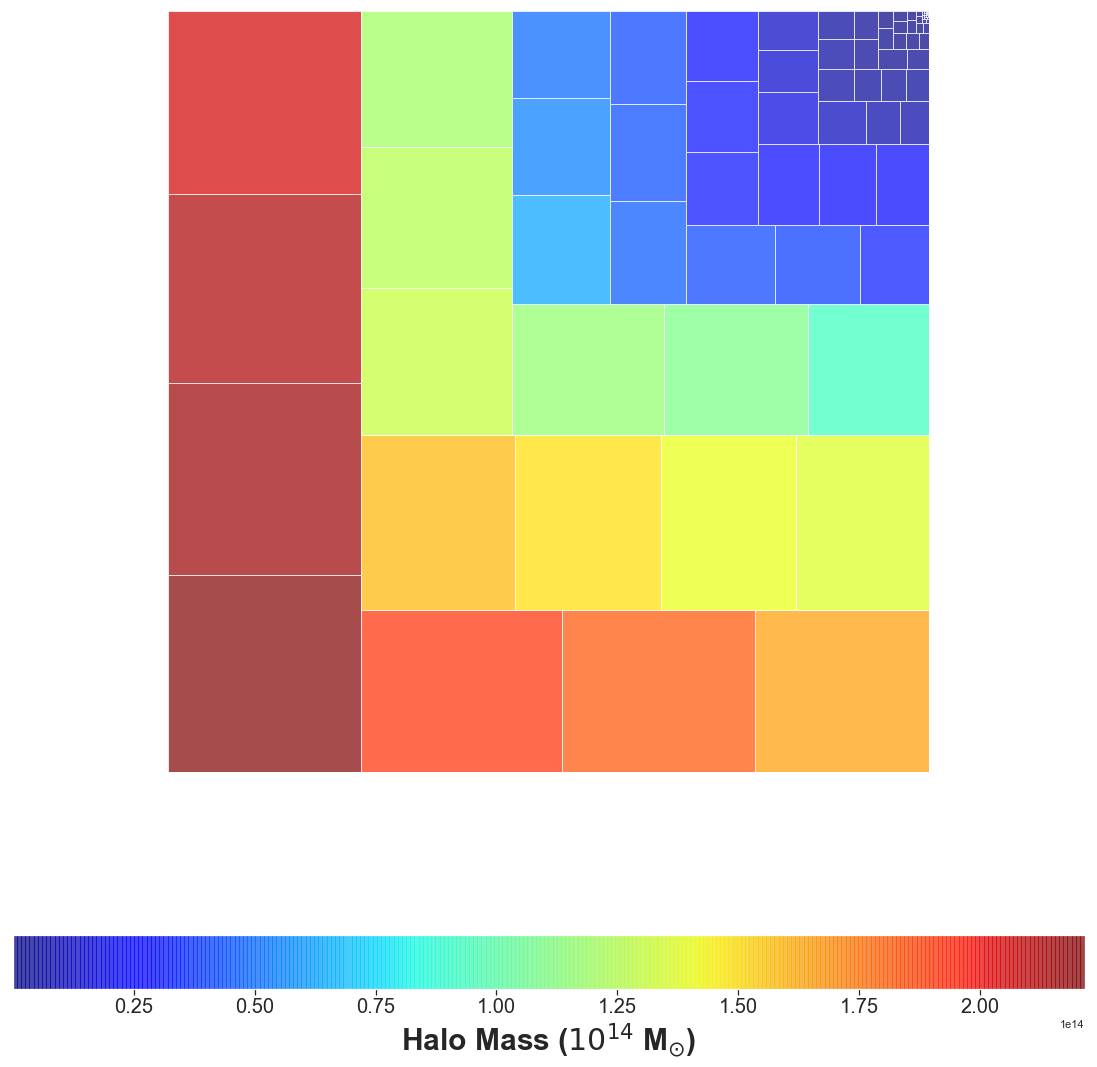

In [26]:
make_treemap_from_halo_masses(masses_progenitors_most_massive_halo_today)

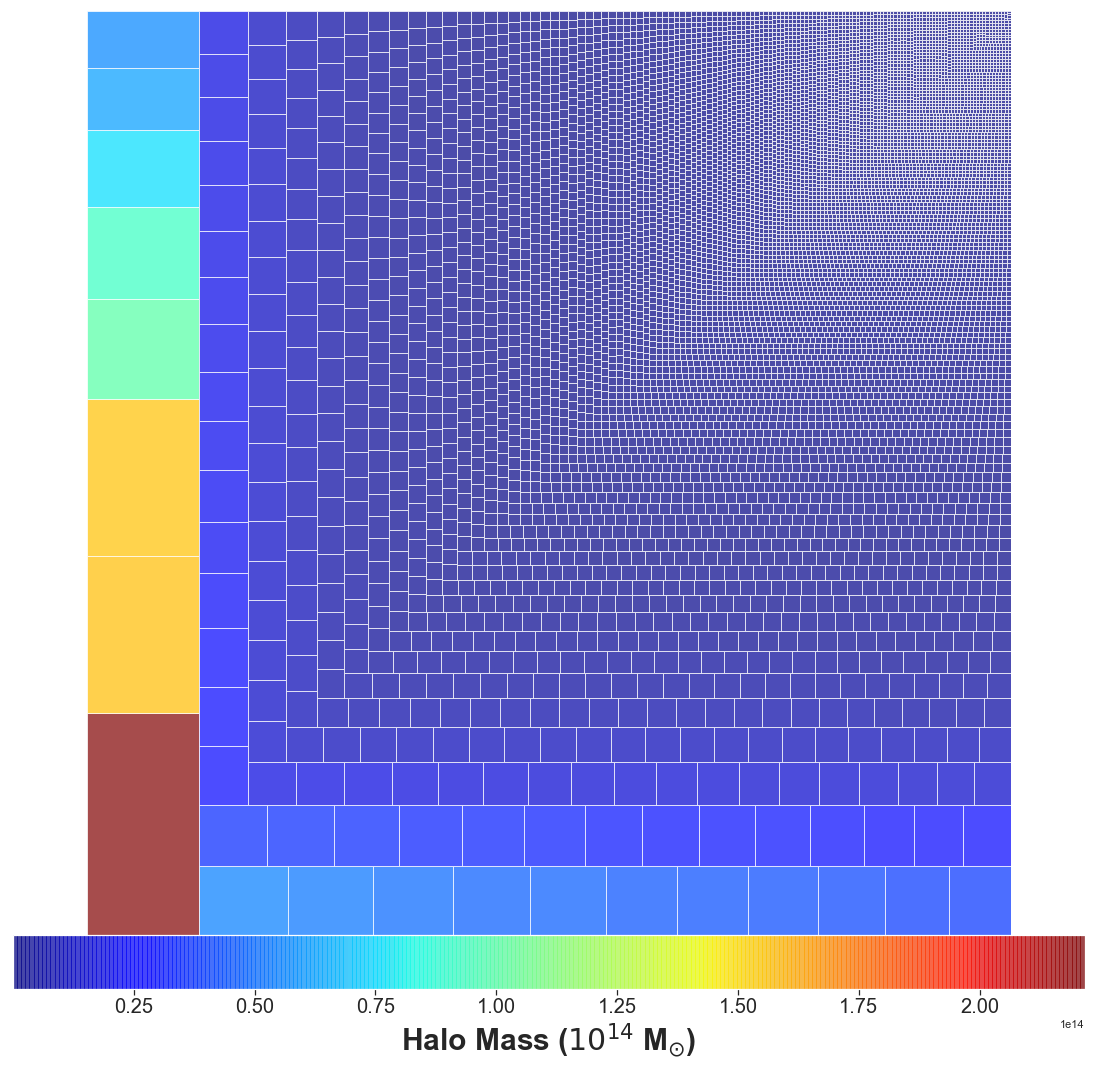

In [11]:
make_treemap_from_halo_masses(masses_all_halos_today[:10000])

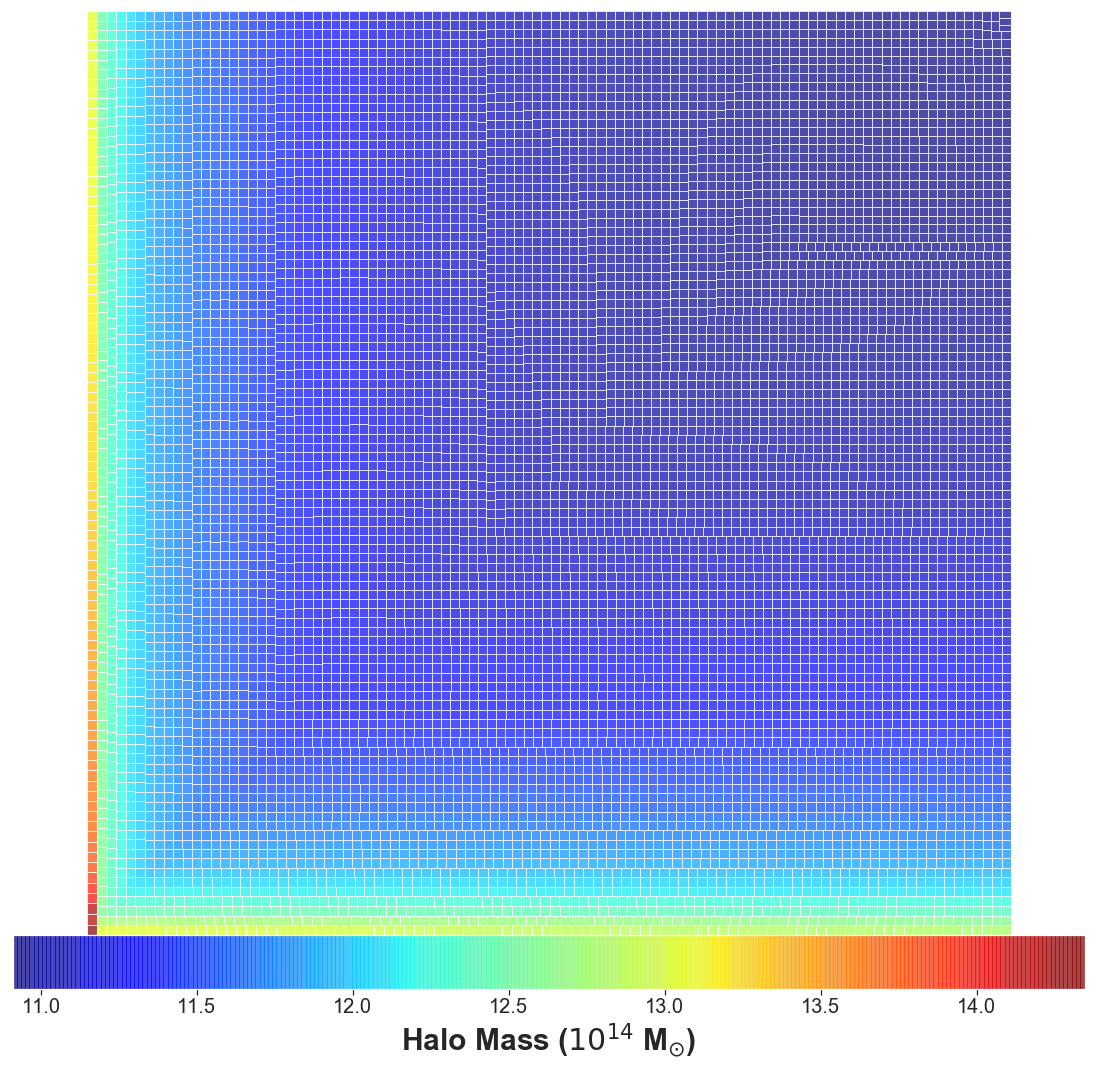

In [13]:
make_treemap_from_halo_masses(np.log10(masses_all_halos_today[:10000]))

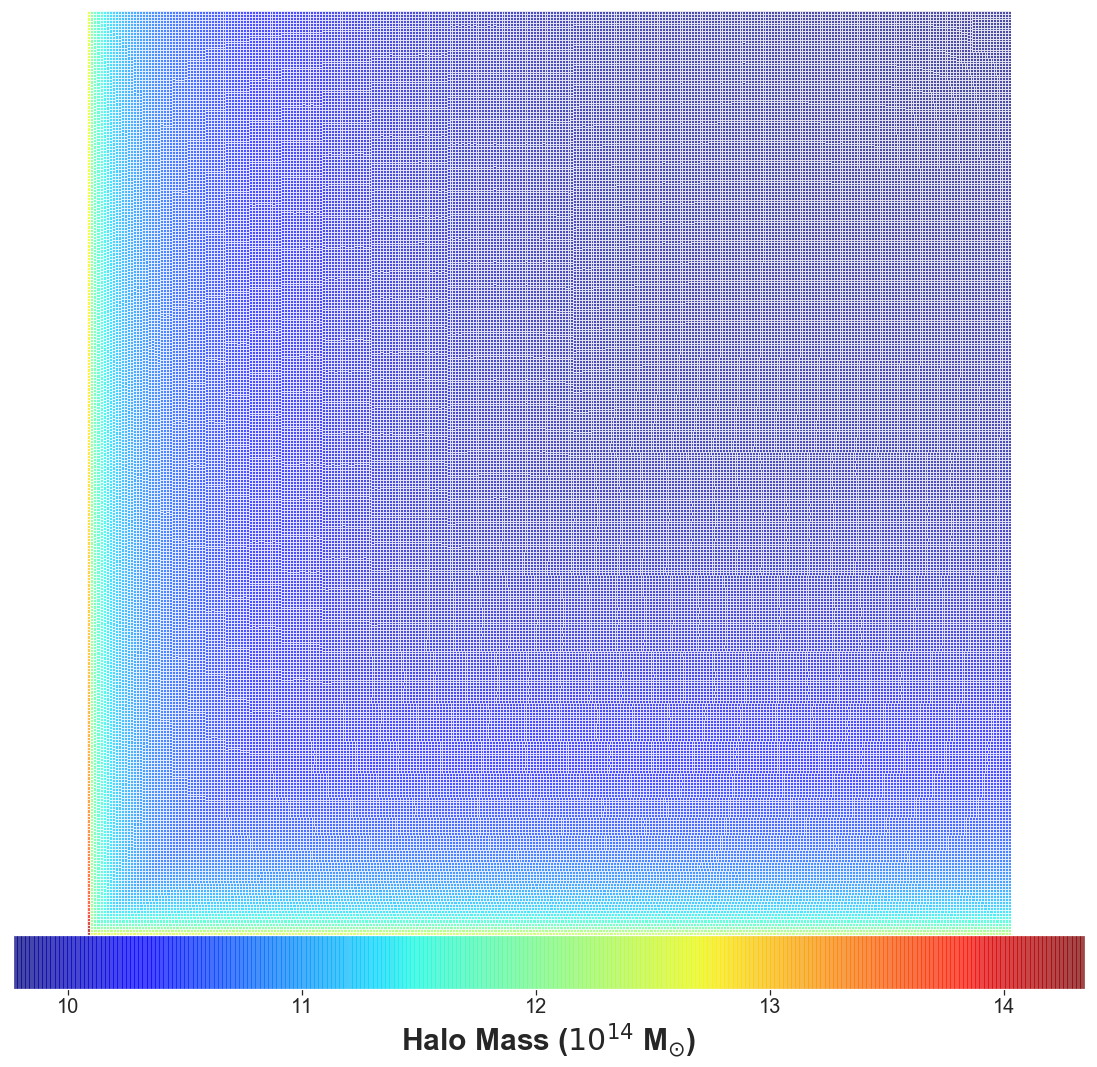

In [27]:
make_treemap_from_halo_masses(masses_all_halos_today[:100000], log=True)

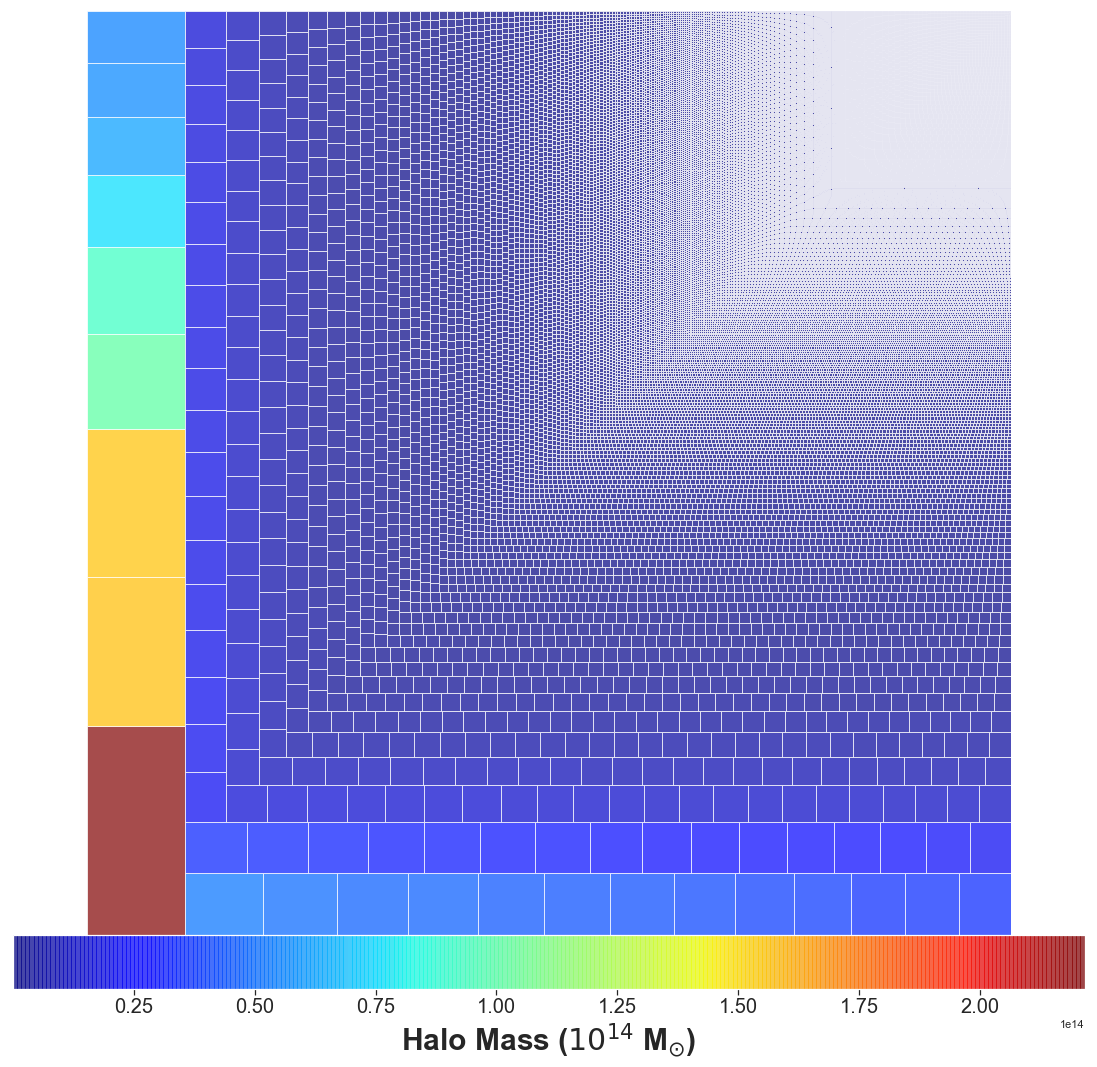

In [29]:
make_treemap_from_halo_masses(masses_all_halos_today[:100000], log=False)

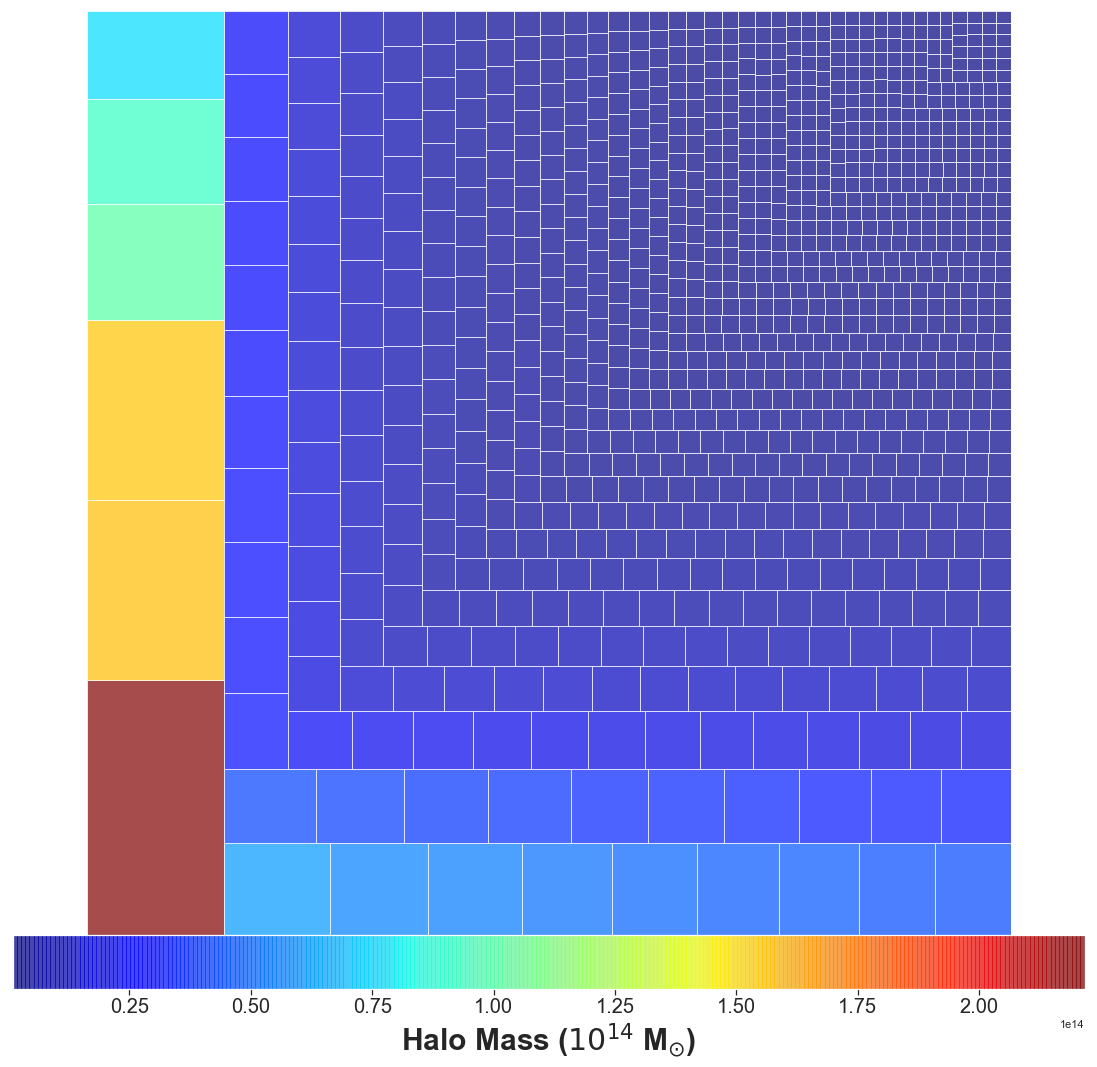

In [30]:
make_treemap_from_halo_masses(masses_all_halos_today[:1000], log=False)

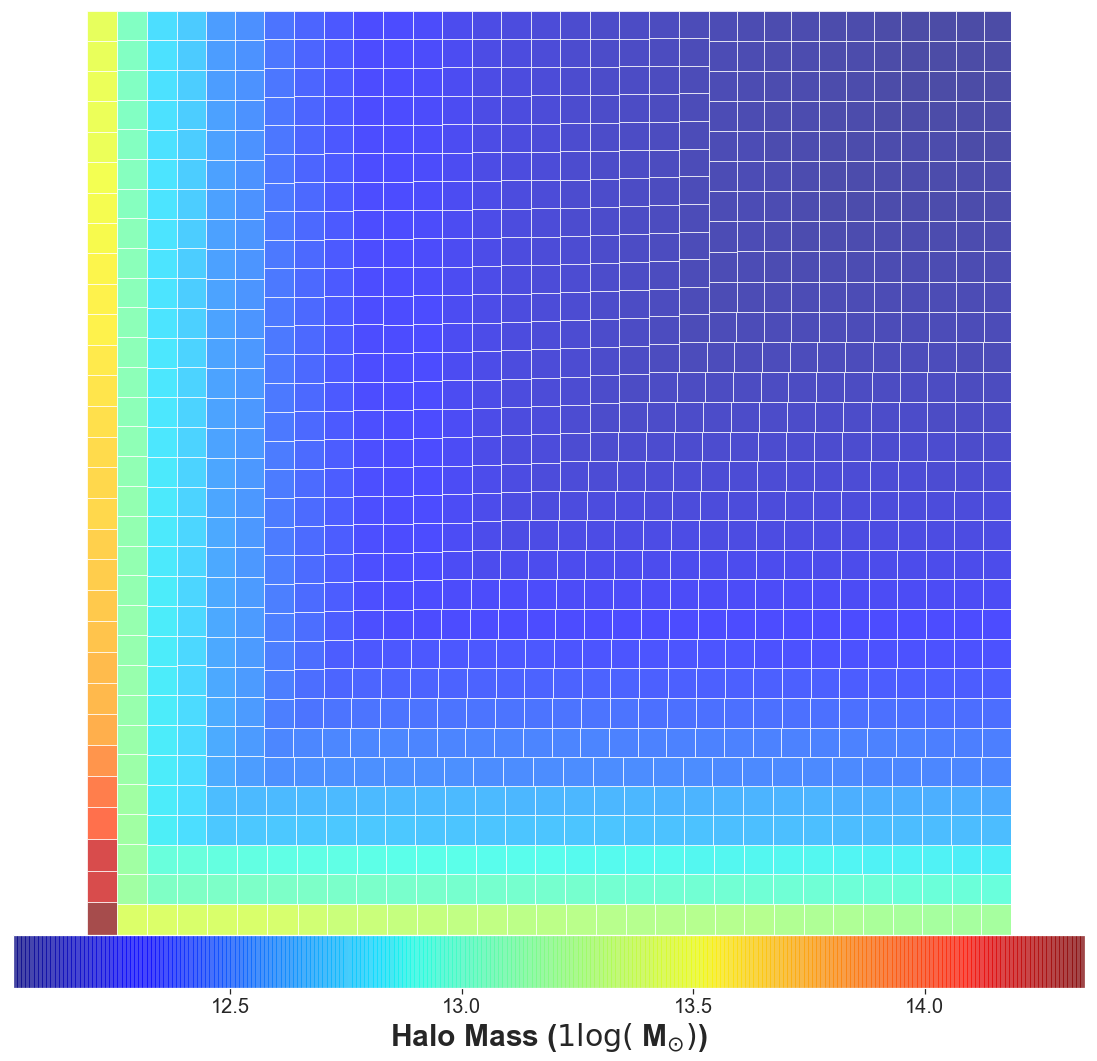

In [31]:
make_treemap_from_halo_masses(masses_all_halos_today[:1000], log=True)

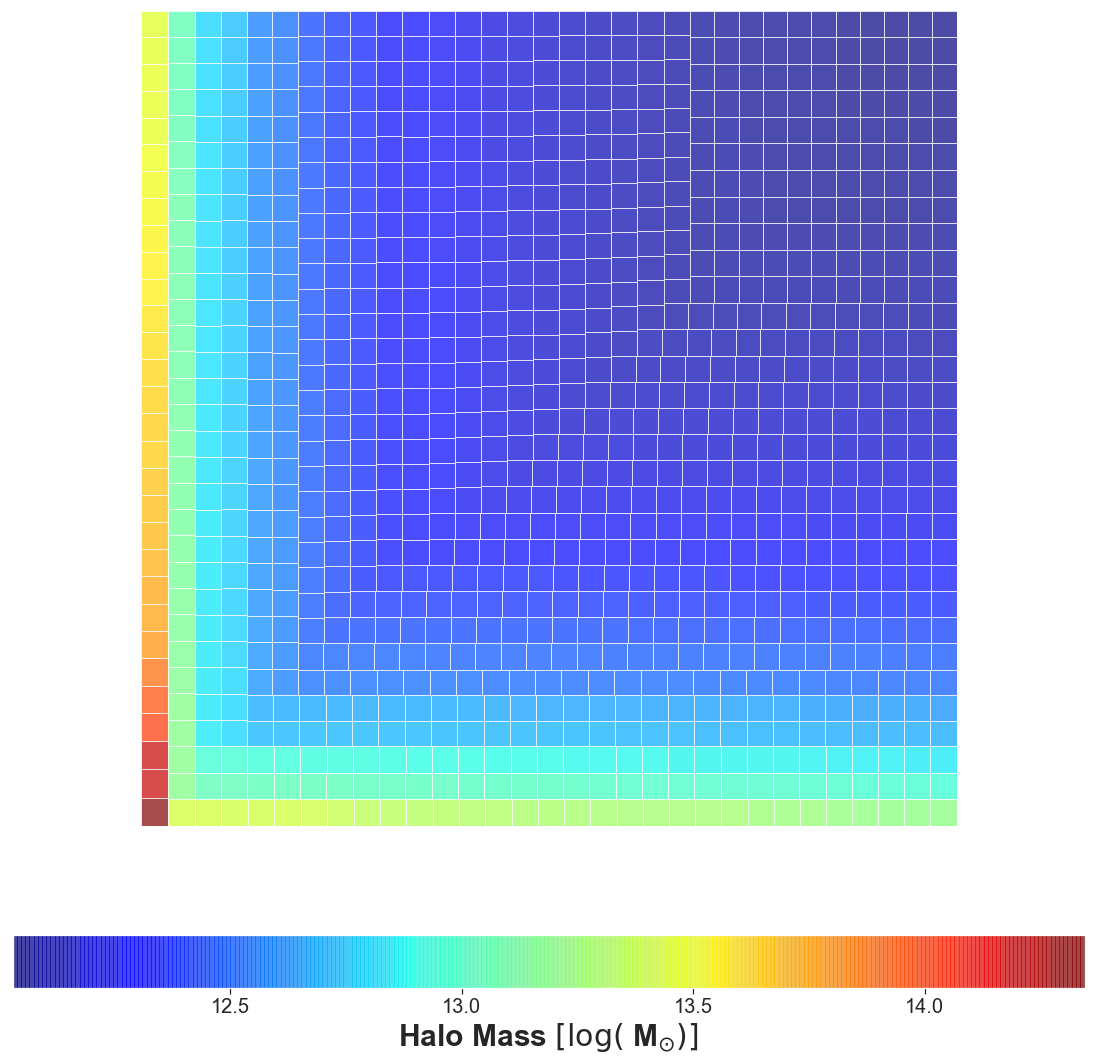

In [45]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True)

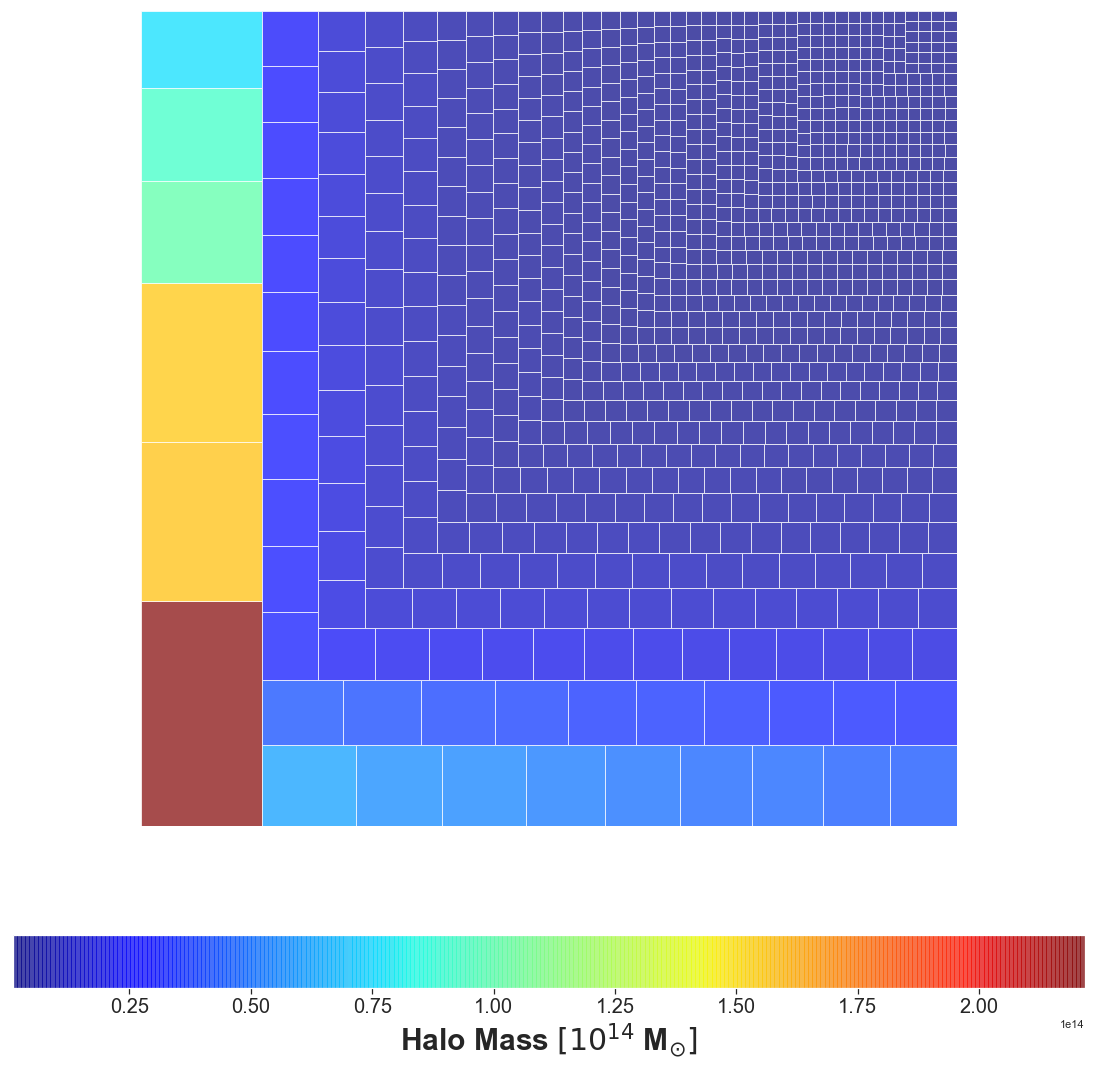

In [107]:
make_treemap_from_halo_masses(masses_all_halos_today, log=False, n=1000)

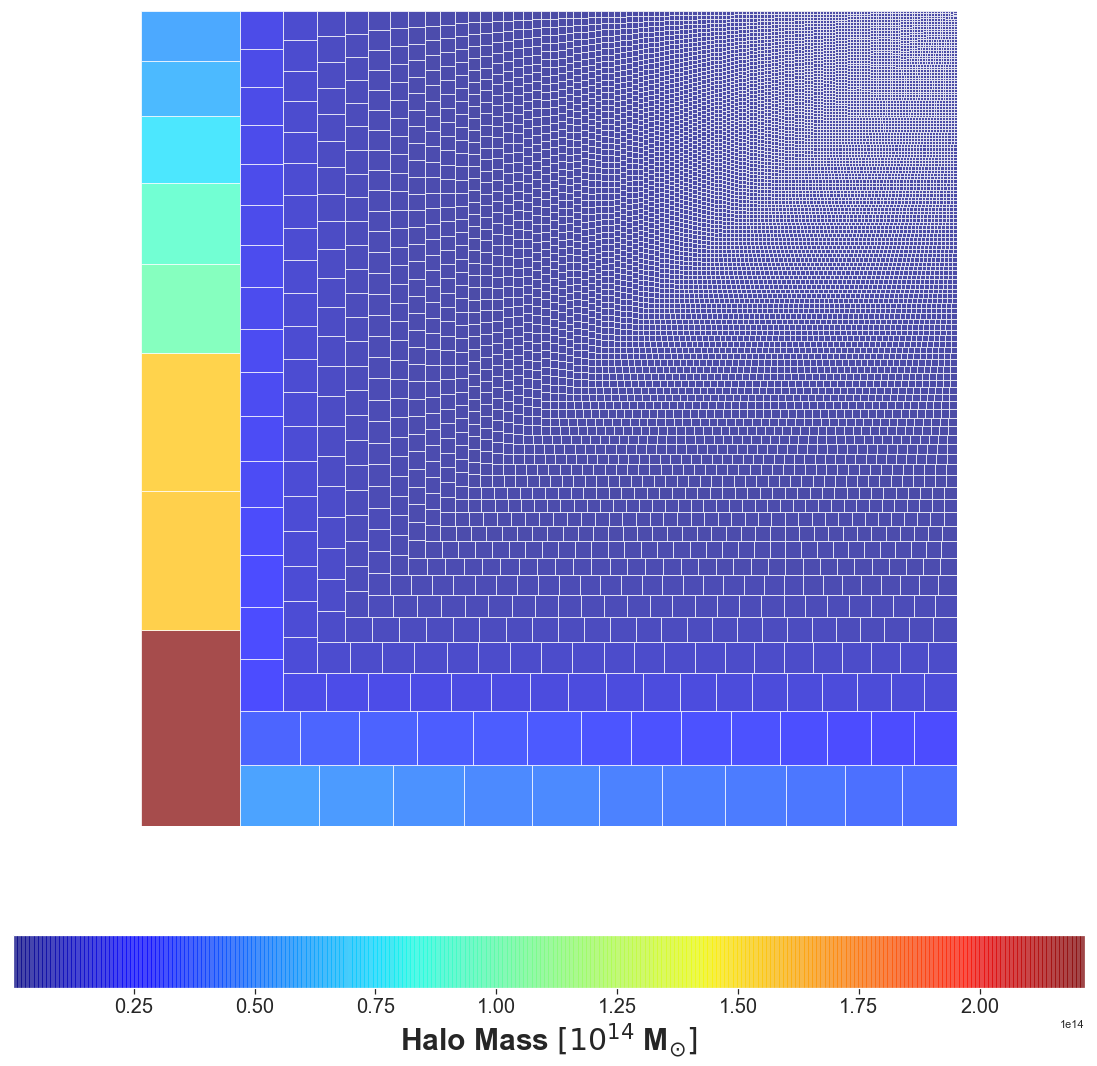

In [110]:
make_treemap_from_halo_masses(masses_all_halos_today, log=False, n=10000)

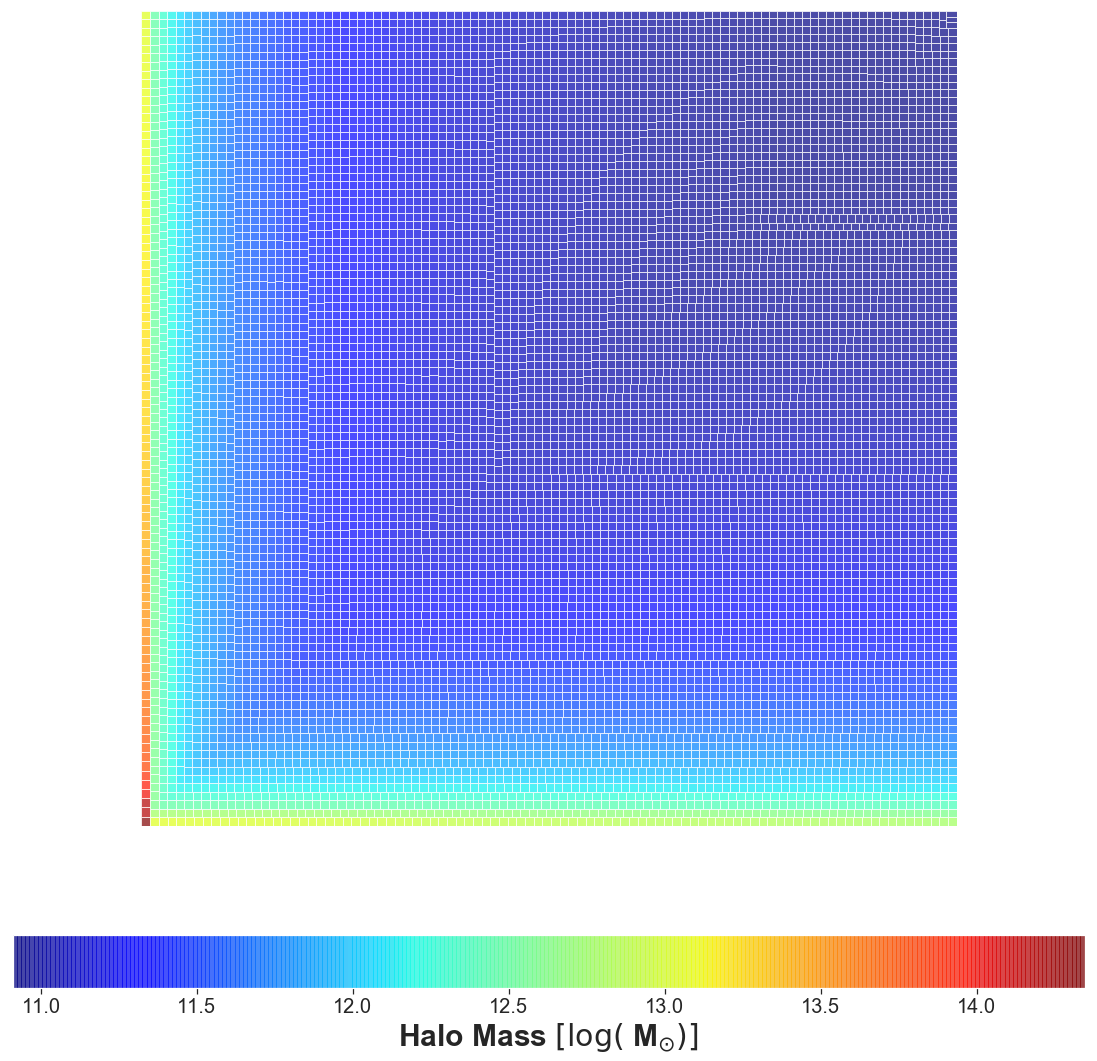

In [109]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True, n=10000)

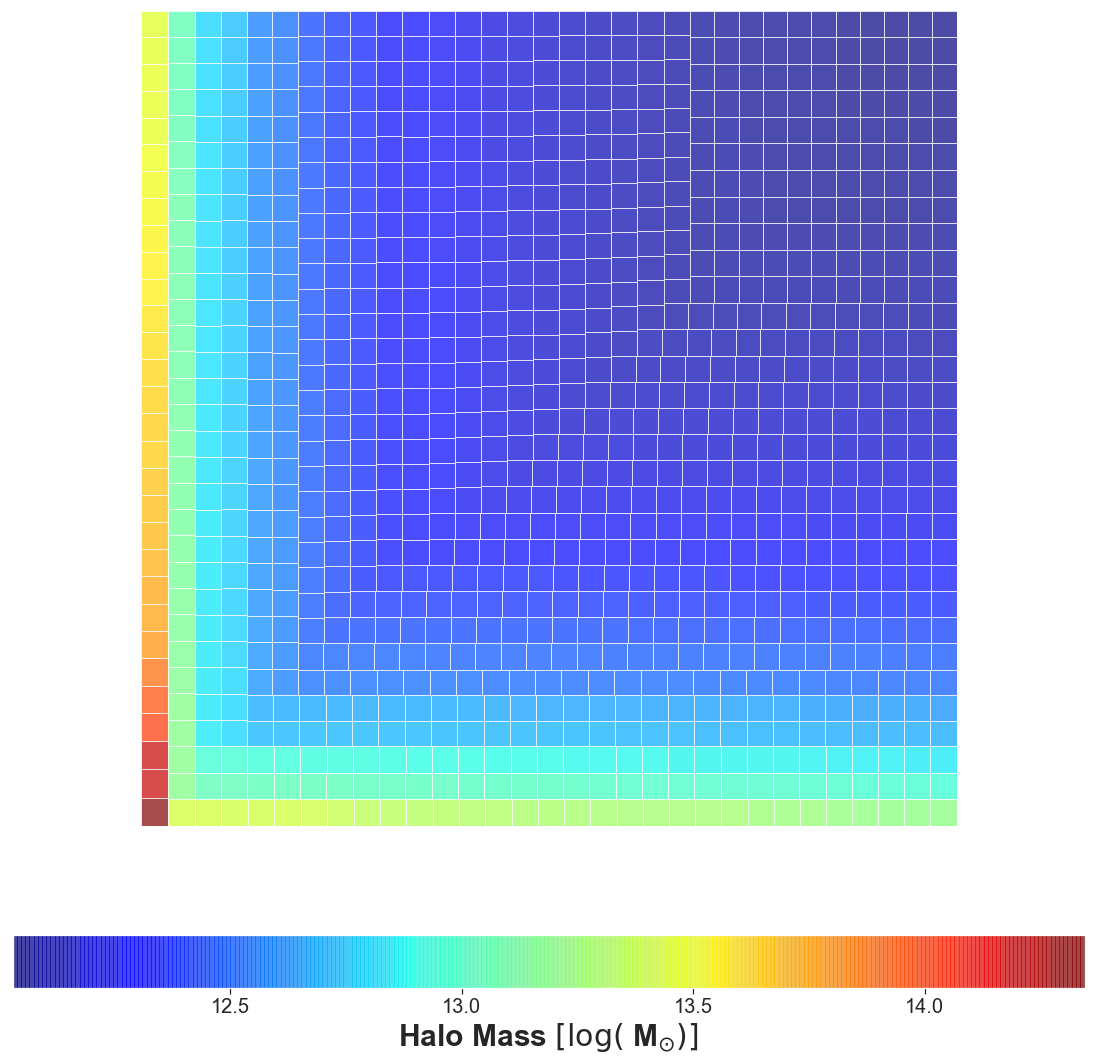

In [108]:
make_treemap_from_halo_masses(masses_all_halos_today, log=True, n=1000)

# most massive halo today

In [116]:
most_massive_halo_today = a[0]
progenitors_most_massive_halo_today = most_massive_halo_today['prog']
masses_progenitors_most_massive_halo_today = most_massive_halo_today['prog', 'mvir']

ancestors_most_massive_halo_today = most_massive_halo_today.ancestors
masses_ancestors_most_massive_halo_today = [ancestor['mvir'] for ancestor in ancestors_most_massive_halo_today]


### ancestors 

In [119]:
np.log10(masses_ancestors_most_massive_halo_today)

array([14.3354579 , 10.17201881, 10.17201881, 10.09829754, 10.05880549,
       10.01535976,  9.9918903 ,  9.97340497,  9.94743372,  9.89795681,
        9.88275216,  9.86693682,  9.83352958,  9.83352958,  9.81577692,
        9.80665472,  9.71432976,  9.67860942,  9.67860942,  9.61161711,
        9.59692681,  9.59692681,  9.53249959,  9.53249959,  9.51481329,
        9.45682135,  9.41329976,  9.41329976,  9.38987456,  9.36492603,
        9.36492603,  9.33865567,  9.33865567,  9.31069331,  9.31069331,
        9.28057837,  9.28057837,  9.28057837,  9.28057837,  9.28057837,
        9.24846372,  9.24846372,  9.24846372,  9.24846372,  9.24846372,
        9.2137833 ,  9.2137833 ,  9.2137833 ,  9.2137833 ,  9.2137833 ,
        9.17580163,  9.17580163,  9.17580163,  9.17580163,  9.17580163,
        9.17580163,  9.17580163,  9.17580163,  9.13449586,  9.13449586,
        9.13449586,  9.13449586,  9.13449586,  9.08884456,  9.08884456,
        9.08884456,  9.08884456,  9.08884456,  9.08884456,  9.08

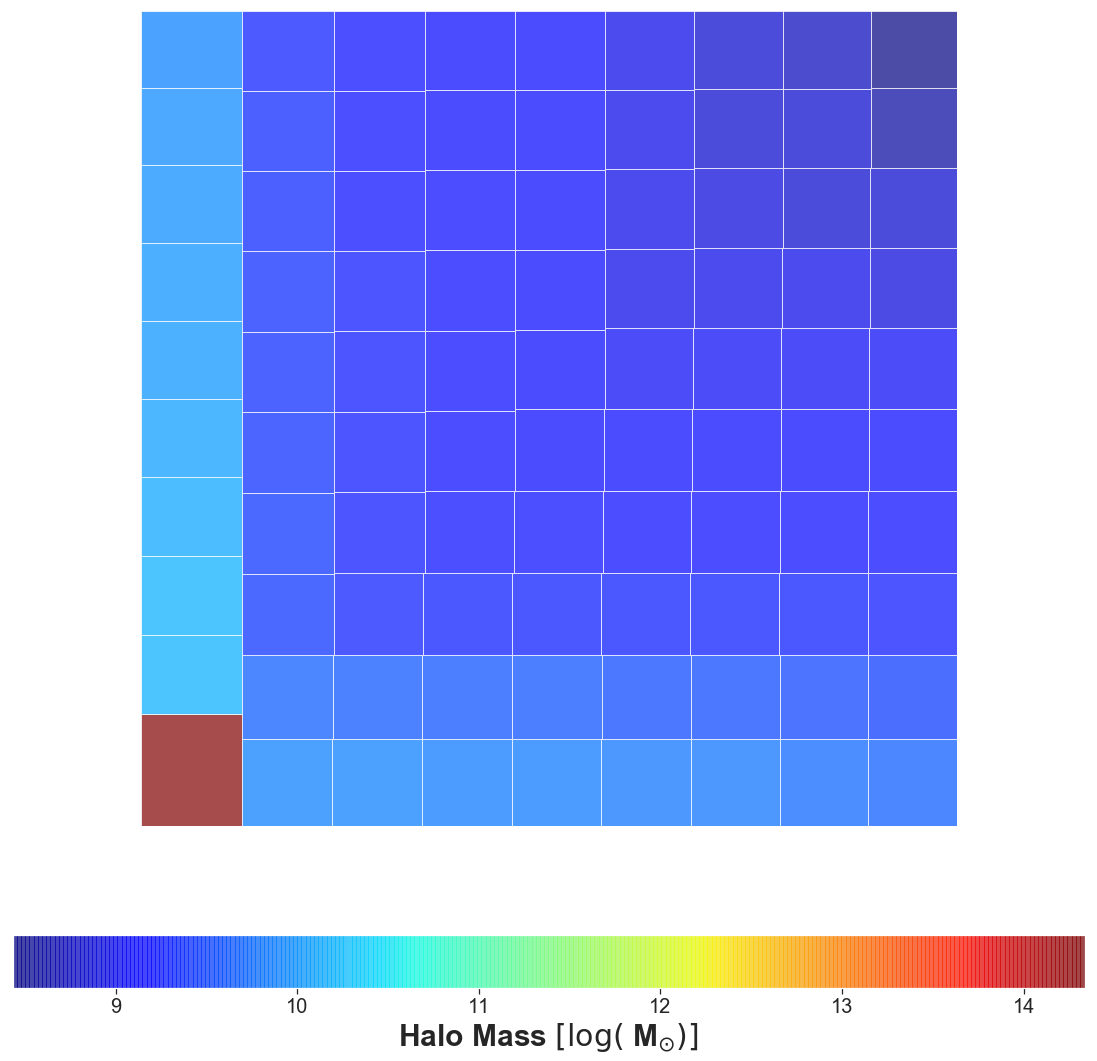

In [133]:
make_treemap_from_halo_masses(masses_ancestors_most_massive_halo_today, log=True, n=1000)

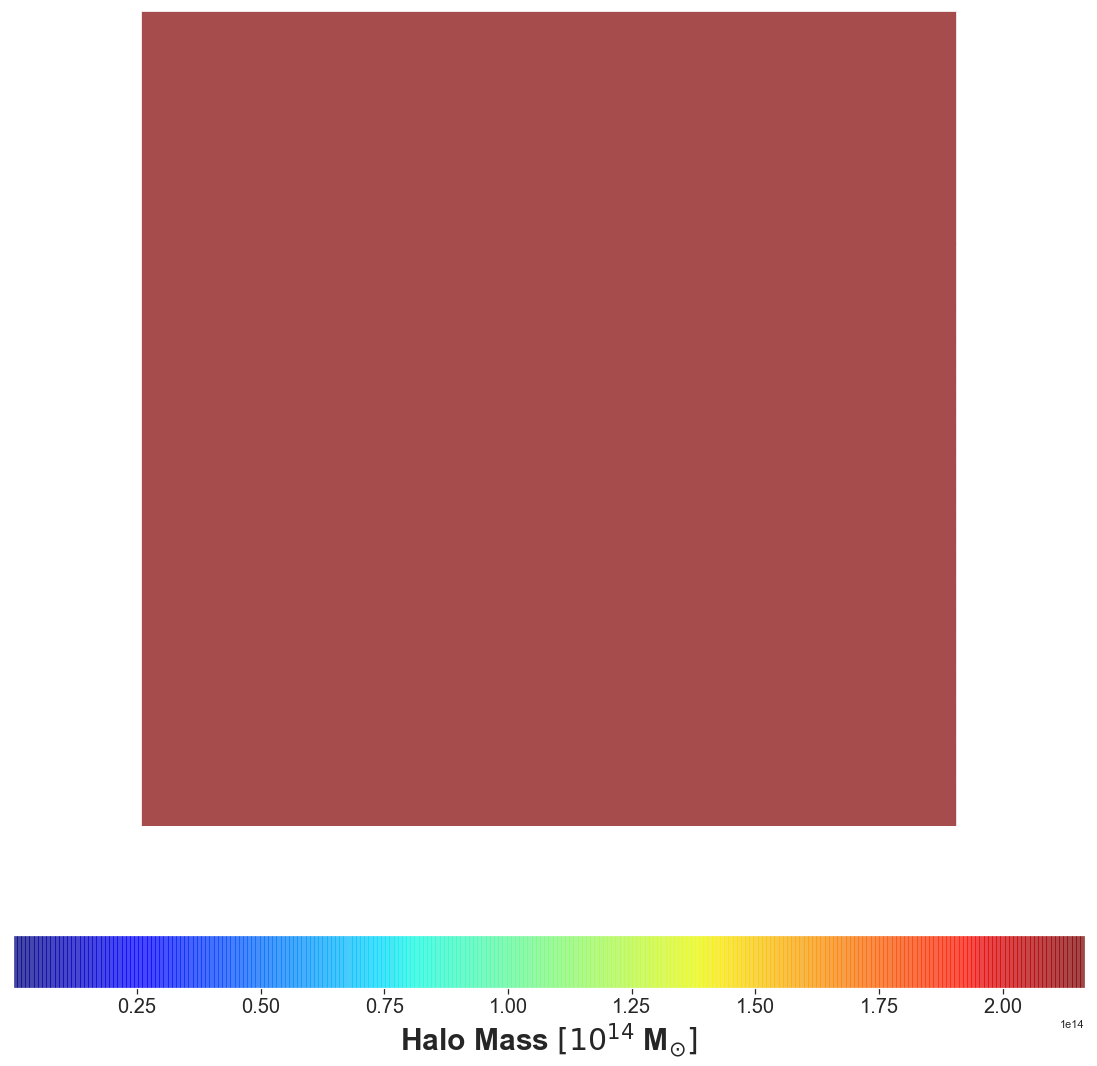

In [123]:
make_treemap_from_halo_masses(masses_ancestors_most_massive_halo_today, log=False, n=1000)

dominated by single most massive ancestor (4 orders of magnitude larger than next biggest)

### most massive progenitors

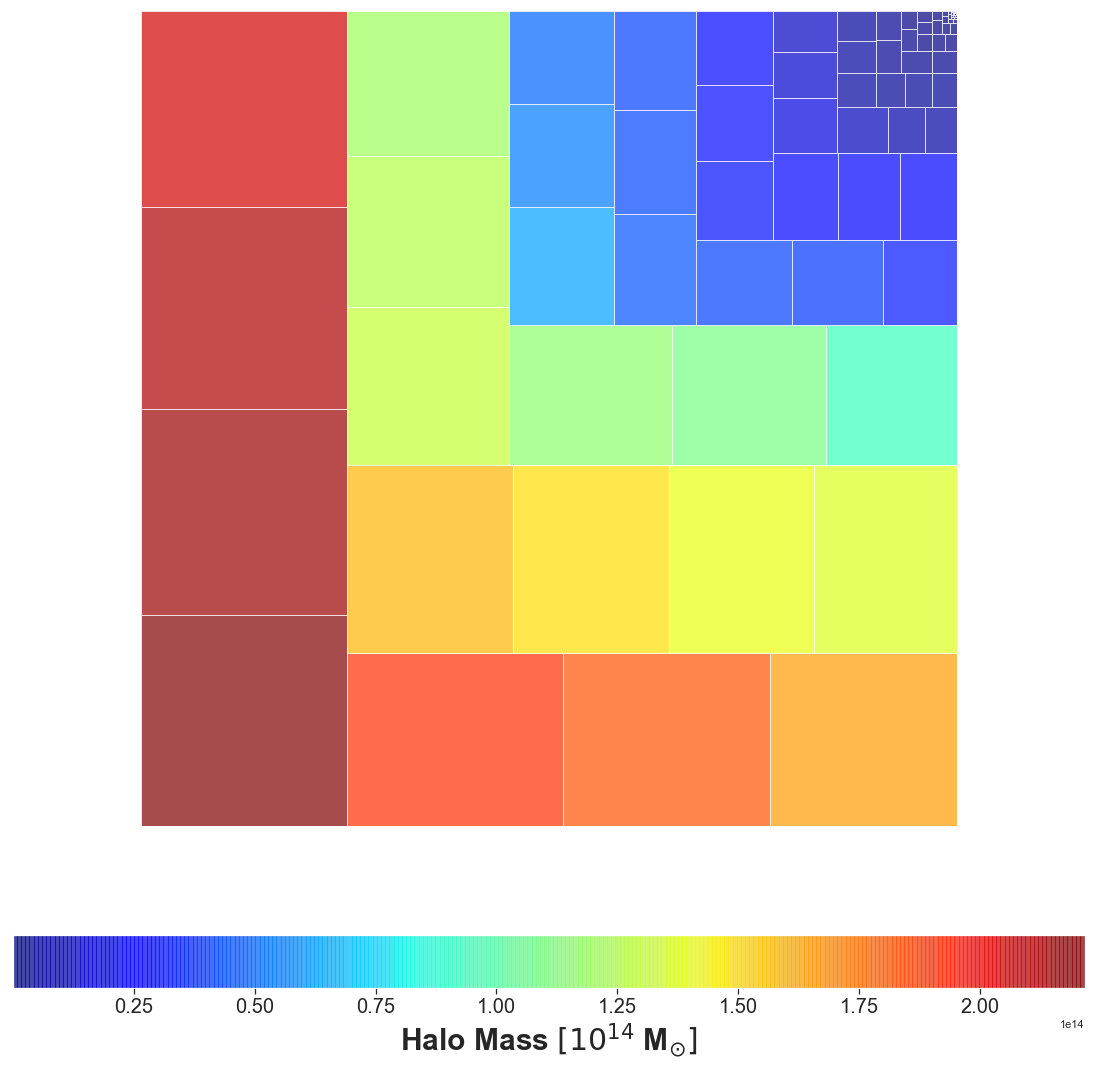

In [136]:
make_treemap_from_halo_masses(masses_progenitors_most_massive_halo_today, log=False, n=1000)

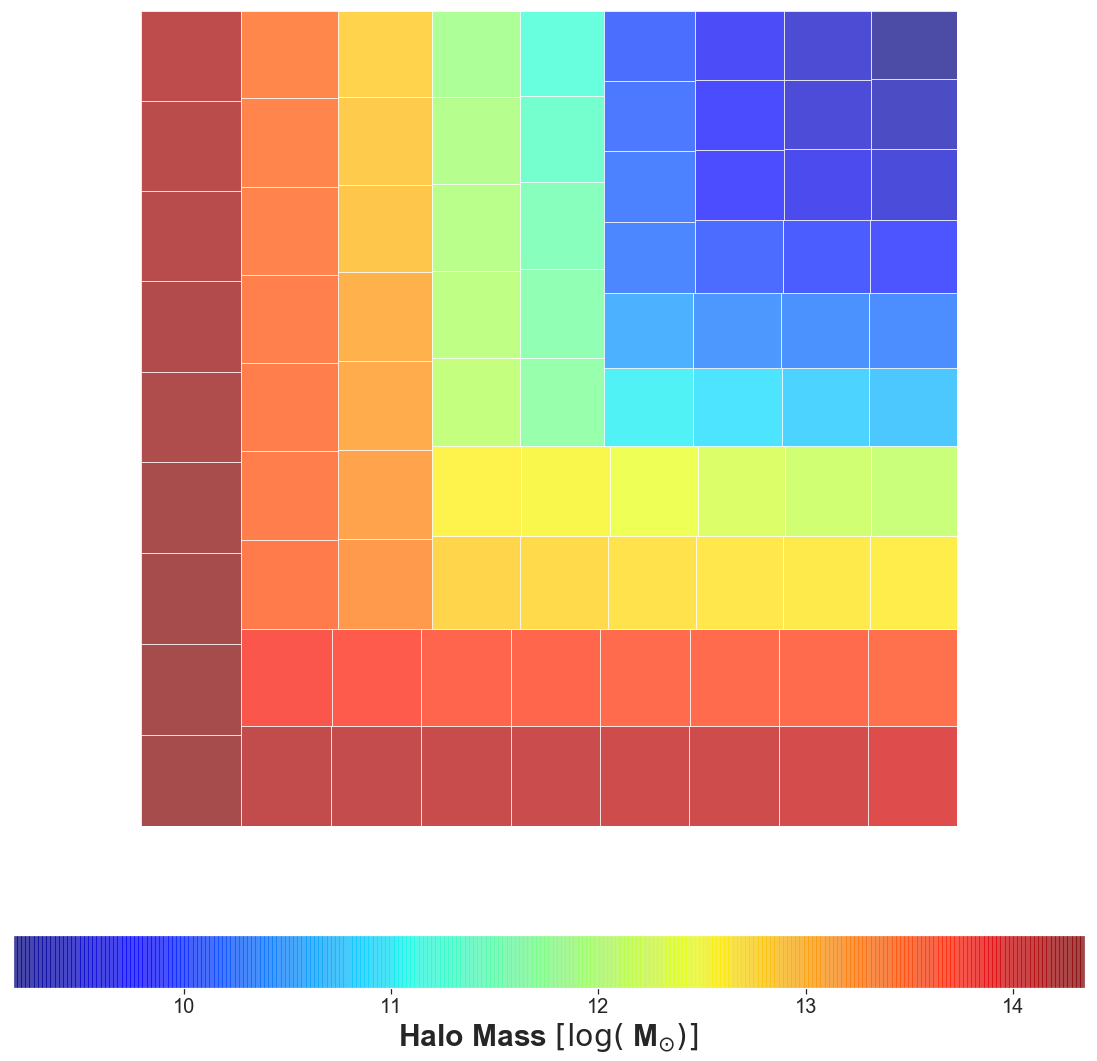

In [137]:
make_treemap_from_halo_masses(masses_progenitors_most_massive_halo_today, log=True, n=1000)

# less massive halo today (10^12)

In [222]:
less_massive_halo_today.__dict__

{'uid': 174283847,
 'arbor': <weakproxy at 0x1a23200a98 to ConsistentTreesArbor at 0x1a23207588>,
 'root': TreeNode[174283847],
 'treeid': 0,
 'descendent': None,
 '_field_data': {'mvir': YTArray([1.073e+12, 9.038e+11, 7.124e+11, 6.921e+11, 8.179e+08, 6.996e+11,
           1.090e+09, 6.914e+11, 1.908e+09, 2.454e+09, 6.817e+11, 1.840e+09,
           2.590e+09, 6.666e+11, 1.772e+09, 2.181e+09, 6.456e+11, 1.772e+09,
           2.590e+09, 6.119e+11, 1.772e+09, 2.726e+09, 4.829e+11, 1.772e+09,
           2.863e+09, 4.234e+11, 1.772e+09, 2.726e+09, 4.118e+11, 1.908e+09,
           2.590e+09, 4.050e+11, 1.363e+09, 2.045e+09, 2.590e+09, 3.958e+11,
           2.590e+09, 1.636e+09, 2.317e+09, 2.863e+09, 3.862e+11, 2.590e+09,
           1.840e+09, 2.454e+09, 2.726e+09, 3.765e+11, 2.590e+09, 2.045e+09,
           2.454e+09, 2.590e+09, 3.685e+11, 1.636e+09, 2.863e+09, 1.772e+09,
           2.454e+09, 2.454e+09, 3.593e+11, 1.976e+09, 3.408e+09, 1.772e+09,
           2.454e+09, 2.590e+09, 3.522e+11, 

In [153]:
less_massive_halo_today = a[1000]
print(np.log10(less_massive_halo_today['mvir']))
progenitors_less_massive_halo_today = less_massive_halo_today['prog']
masses_progenitors_less_massive_halo_today = less_massive_halo_today['prog', 'mvir']

ancestors_less_massive_halo_today = less_massive_halo_today.ancestors
masses_ancestors_less_massive_halo_today = [ancestor['mvir'] for ancestor in ancestors_less_massive_halo_today]


12.03059972196595


In [154]:
masses_progenitors_less_massive_halo_today

YTArray([1.073e+12, 9.038e+11, 7.124e+11, 6.921e+11, 6.996e+11, 6.914e+11,
         6.817e+11, 6.666e+11, 6.456e+11, 6.119e+11, 4.829e+11, 4.234e+11,
         4.118e+11, 4.050e+11, 3.958e+11, 3.862e+11, 3.765e+11, 3.685e+11,
         3.593e+11, 3.522e+11, 3.344e+11, 3.236e+11, 3.134e+11, 3.064e+11,
         2.927e+11, 2.897e+11, 2.947e+11, 2.940e+11, 2.898e+11, 2.852e+11,
         2.778e+11, 2.732e+11, 2.692e+11, 2.662e+11, 2.684e+11, 2.568e+11,
         2.429e+11, 2.321e+11, 2.268e+11, 1.964e+11, 1.685e+11, 1.546e+11,
         1.543e+11, 1.662e+11, 1.632e+11, 1.544e+11, 1.393e+11, 1.264e+11,
         1.101e+11, 9.051e+10, 4.839e+10, 3.094e+10, 3.067e+10, 3.149e+10,
         2.781e+10, 2.413e+10, 2.235e+10, 2.045e+10, 1.799e+10, 1.786e+10,
         1.622e+10, 1.418e+10, 1.309e+10, 1.118e+10, 8.588e+09, 7.634e+09,
         7.225e+09, 7.225e+09, 5.998e+09, 6.134e+09, 5.452e+09, 4.635e+09,
         4.362e+09, 3.953e+09, 3.340e+09, 2.726e+09, 1.908e+09, 1.908e+09]) Msun/h

In [155]:
masses_ancestors_less_massive_halo_today

[903800000000.0 Msun/h]

In [198]:
masses_all_ancestors_less_massive_halo_today = less_massive_halo_today['tree', 'mvir']
redshift_all_ancestors_less_massive_halo_today = np.round(less_massive_halo_today['tree', 'redshift'],1)

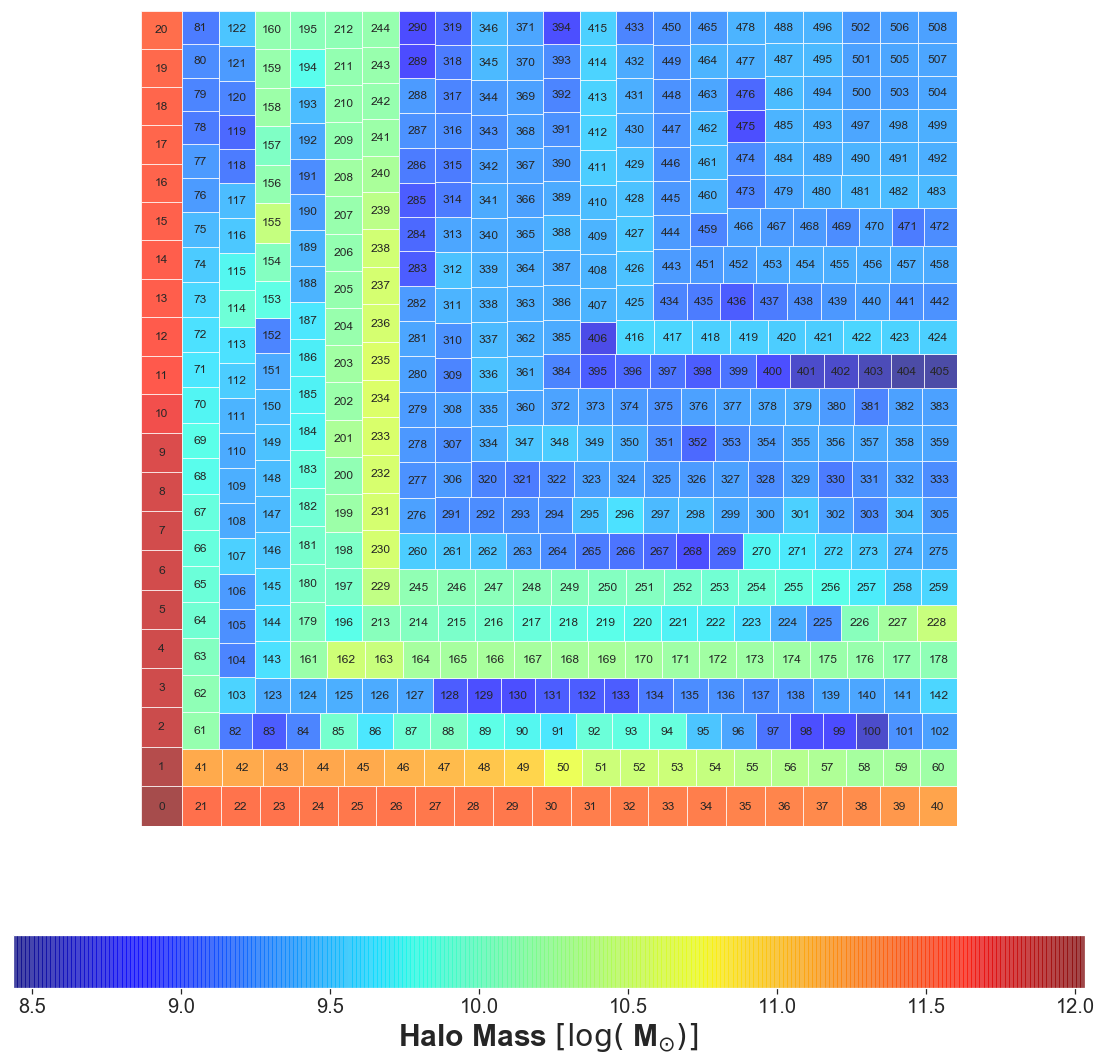

In [190]:
#order
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today,
                              labels=range(len(masses_all_ancestors_less_massive_halo_today)),
                              log=True, n=1000, sorted='time')




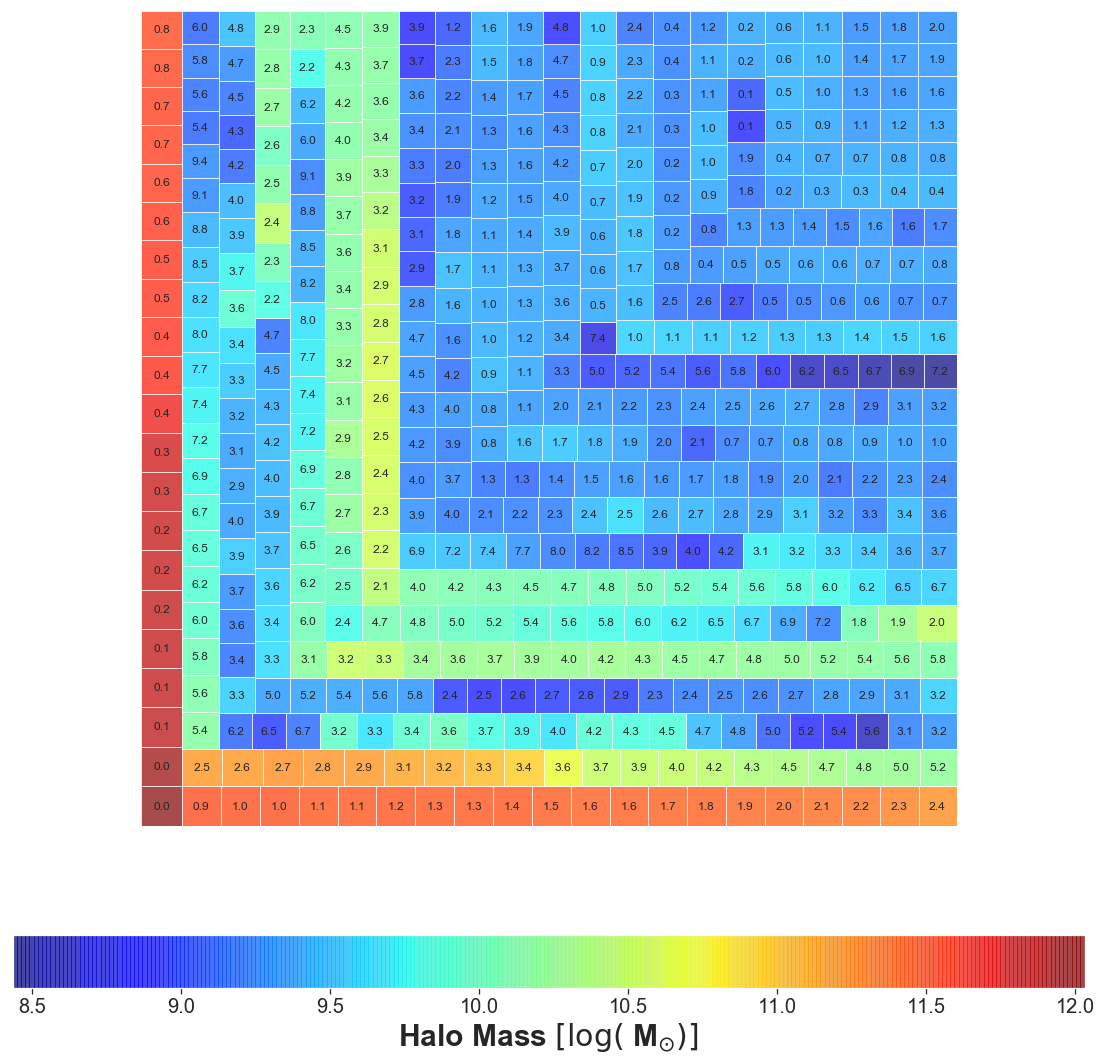

In [203]:
#redshift
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today,
                              labels=redshift_all_ancestors_less_massive_halo_today,
                              log=True, n=1000, sorted='time')




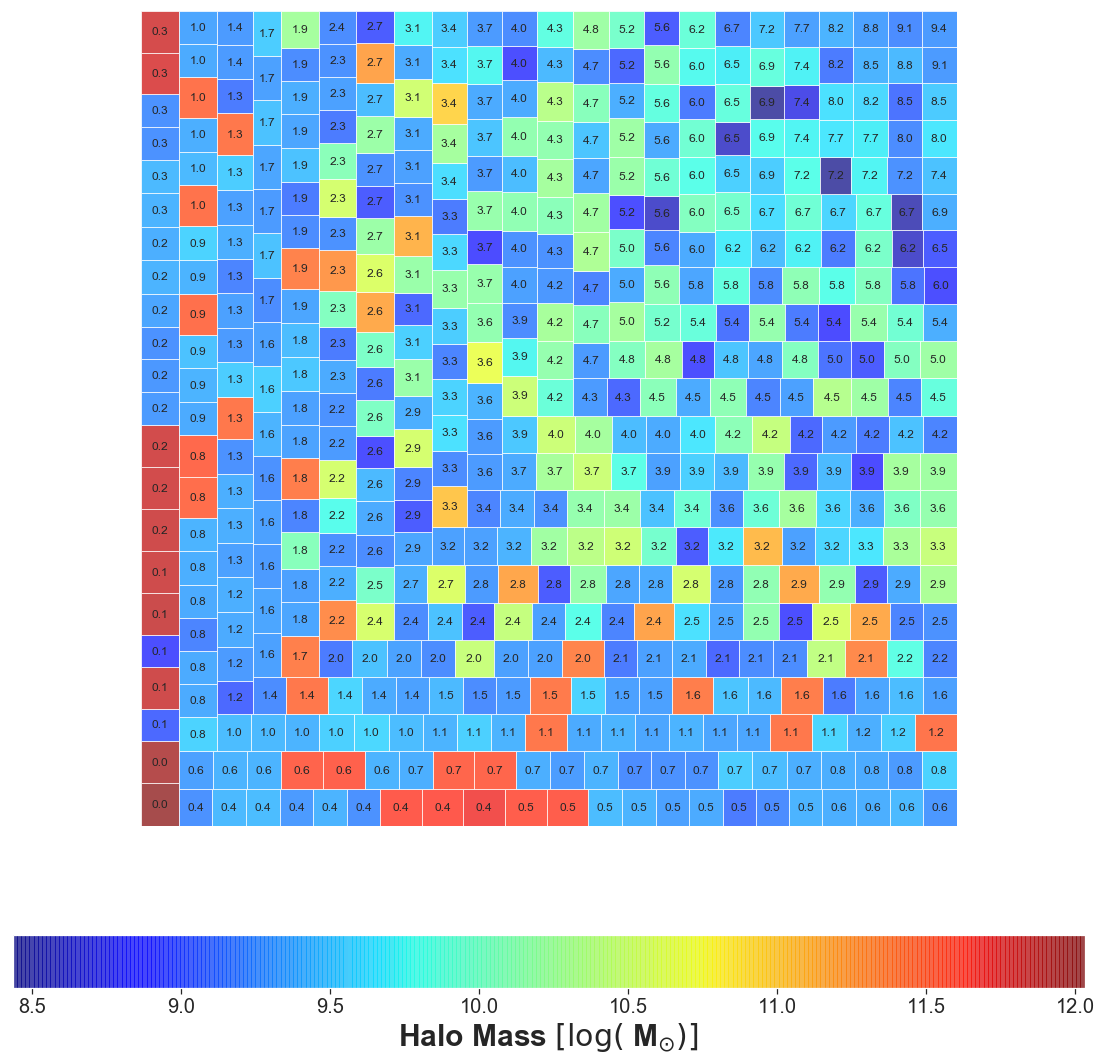

In [216]:
#redshift
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today,
                              labels=redshift_all_ancestors_less_massive_halo_today,
                              log=True, n=1000, sorted_by=redshift_all_ancestors_less_massive_halo_today)




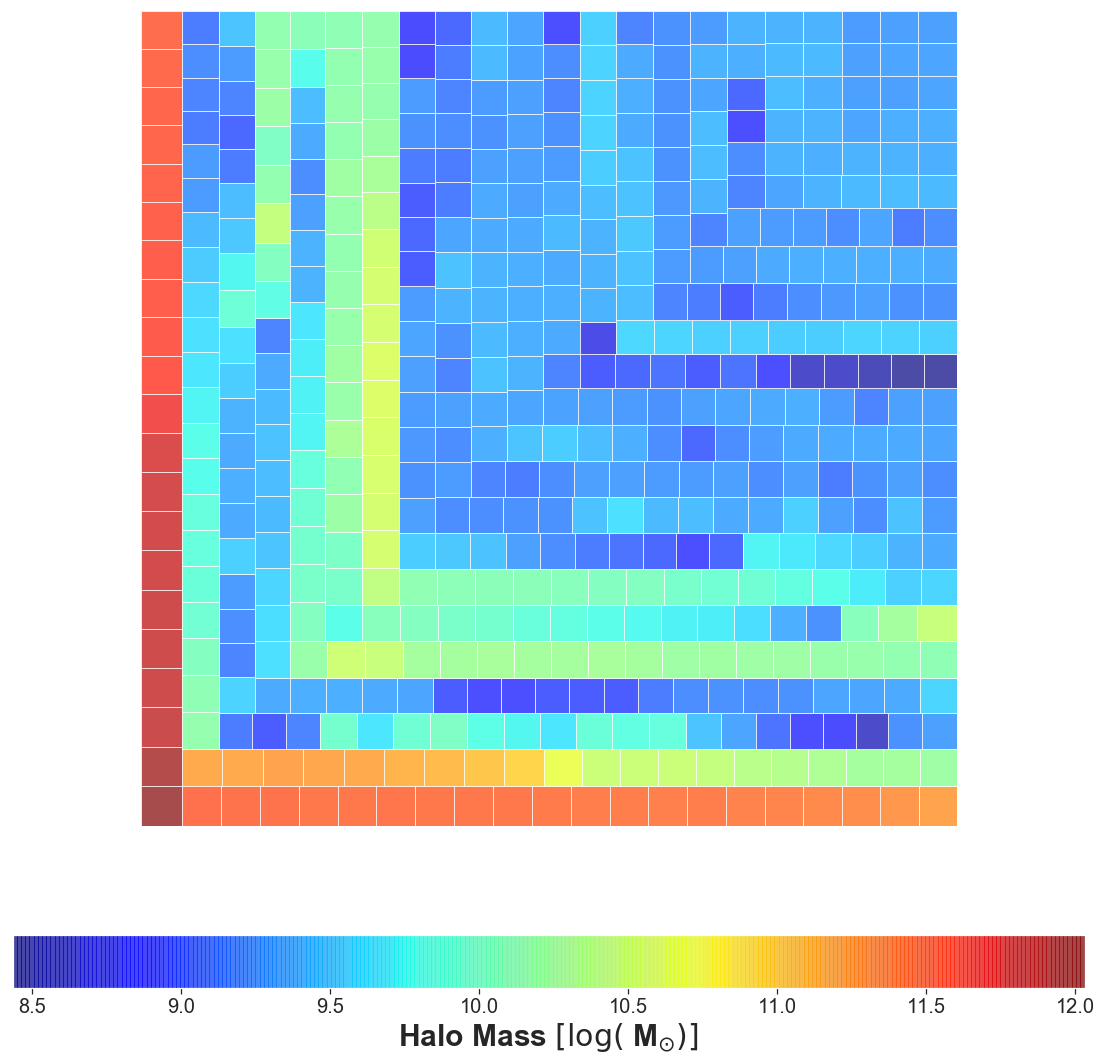

In [178]:
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today, log=True, n=1000, sorted='time')

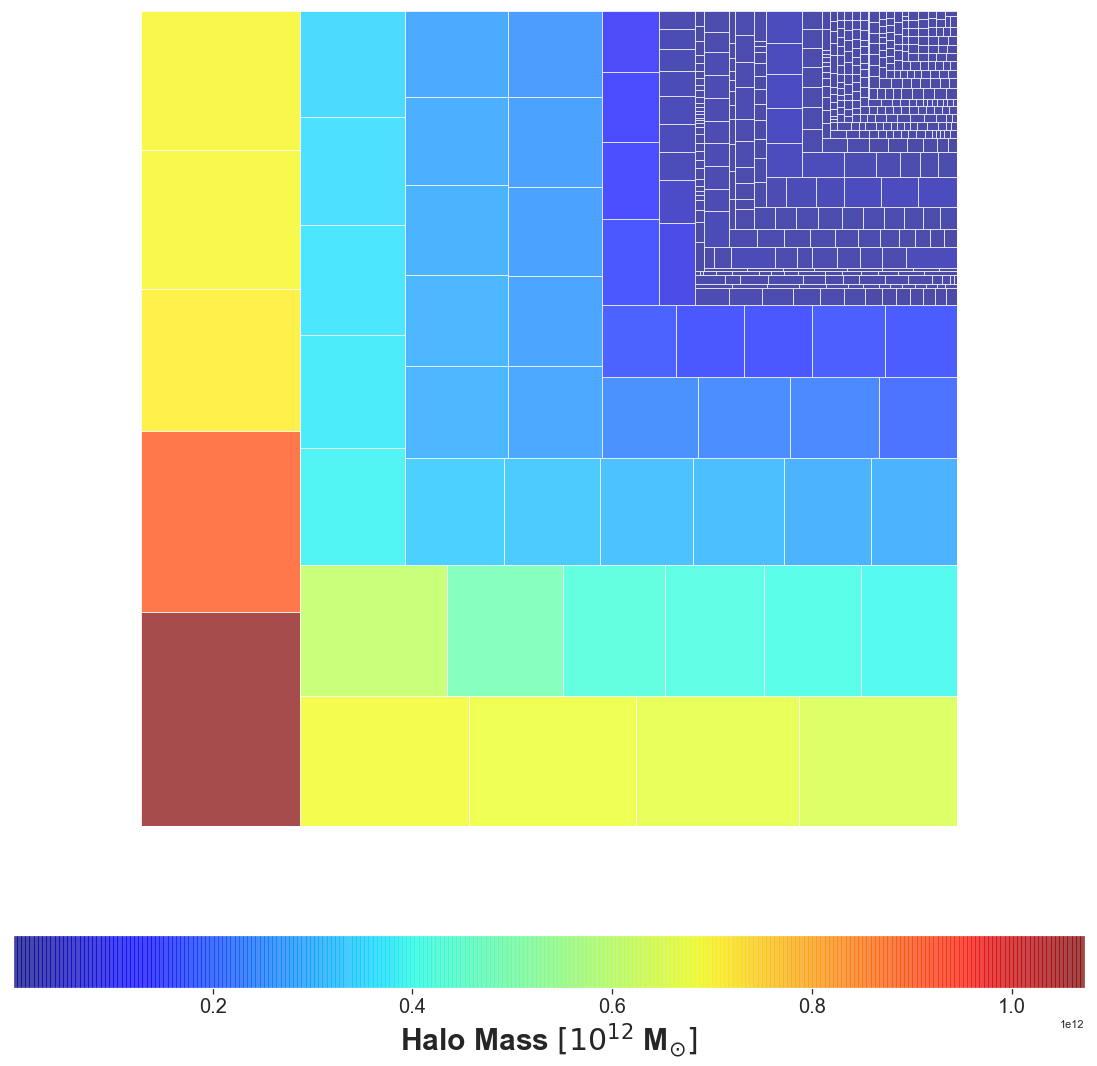

In [179]:
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today, log=False, n=1000, sorted='time')

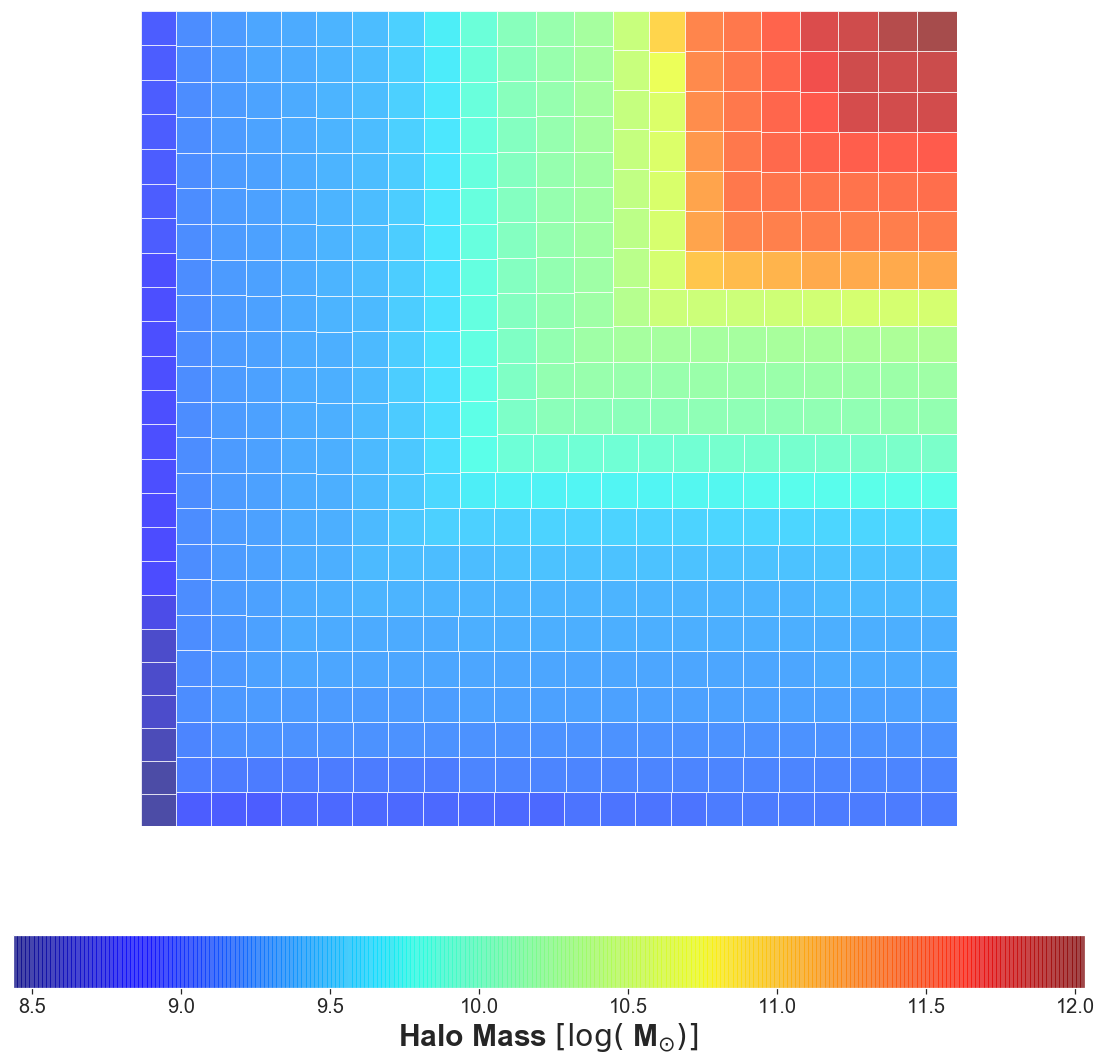

In [172]:
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today, log=True, n=1000, sorted='mass')

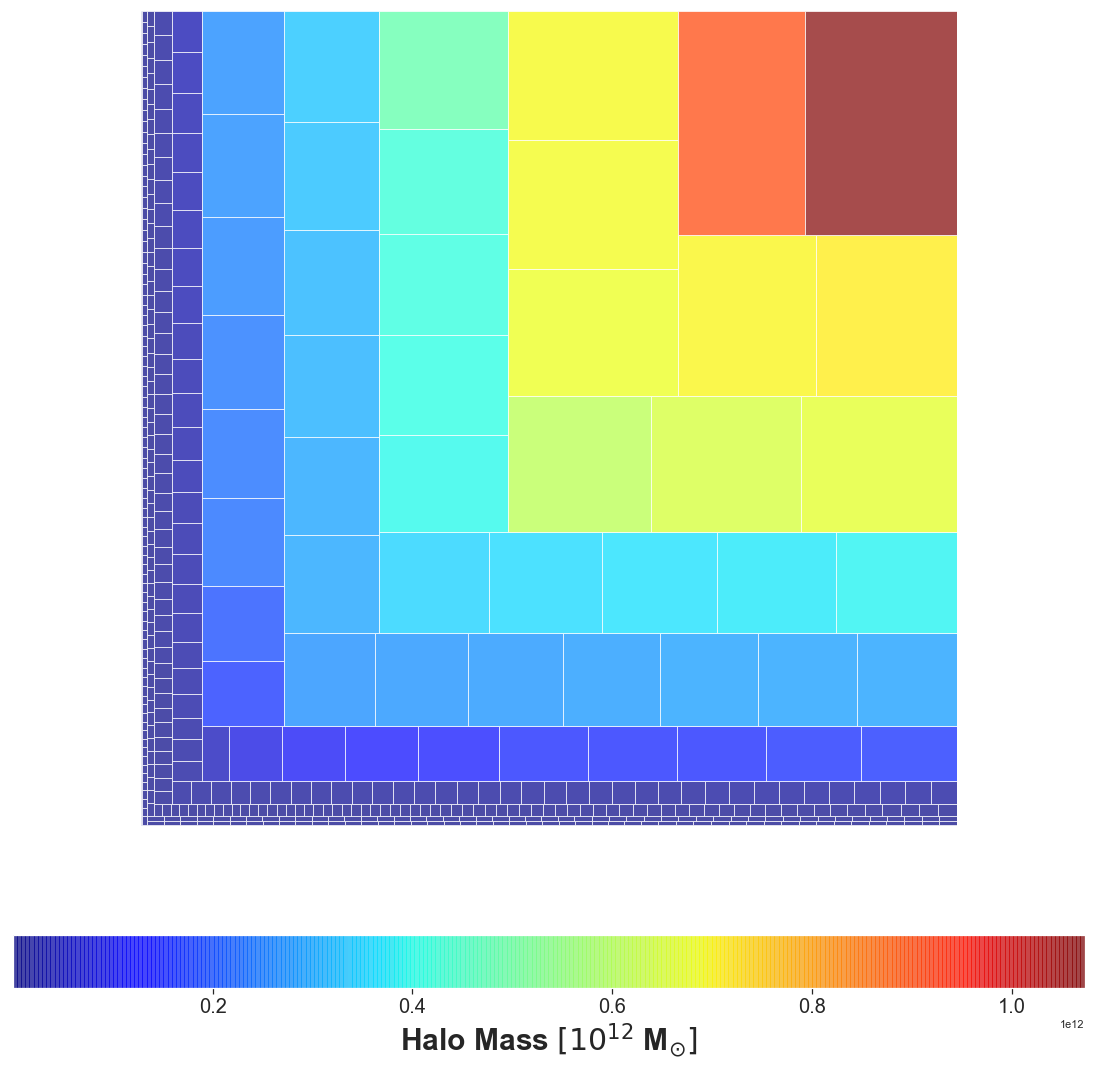

In [180]:
make_treemap_from_halo_masses(masses_all_ancestors_less_massive_halo_today, n=1000, sorted='mass')